In [2]:
import os, os.path
import numpy as np
import cv2
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.image as mpimg
%matplotlib inline

for layer in range(0, 6):
    fps = 30
    print("Create sequence still images from the video... fps=", fps)
    directory = './dataset/'+str(layer)+'/'
    os.system('ffmpeg -i '+directory+'video-'+str(layer)+'.m4v -vf fps='+str(fps)+' '+directory+'/images/image-'+str(layer)+'-%d.png')
    
    directory = './dataset/'+str(layer)+'/images/'
    n_files = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    print("number of files in the directory is ", n_files)

    print("Layer: ", layer)
    print("resizeng and padding...")
    for i in range(1, n_files+1):
        # reading in an image
        image = mpimg.imread(directory+'image-'+str(layer)+'-'+str(i)+'.png')
        image = cv2.resize(image, (224, int(image.shape[0]/image.shape[1]*224)))
        image = np.pad(image, ((57,57),(0,0),(0,0)), 'constant')
        mpimg.imsave(directory+'image-'+str(layer)+'-'+str(i)+'.png', image)
        
print("done")

Create sequence still images from the video... fps= 30
number of files in the directory is  9541
Layer:  0
resizeng and padding...
Create sequence still images from the video... fps= 30
number of files in the directory is  37345
Layer:  1
resizeng and padding...
Create sequence still images from the video... fps= 30
number of files in the directory is  30701
Layer:  2
resizeng and padding...
Create sequence still images from the video... fps= 30
number of files in the directory is  26359
Layer:  3
resizeng and padding...
Create sequence still images from the video... fps= 30
number of files in the directory is  14219
Layer:  4
resizeng and padding...
Create sequence still images from the video... fps= 30
number of files in the directory is  7122
Layer:  5
resizeng and padding...
done


This image is: <class 'numpy.ndarray'> with dimensions: (224, 224, 4)
This image is: <class 'numpy.ndarray'> with dimensions: (224, 224, 3)


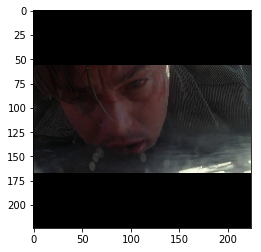

In [3]:
layer = 5
i = 1000

# printing out some stats and plotting
image = mpimg.imread(directory+'image-'+str(layer)+'-'+str(i)+'.png')
print('This image is:', type(image), 'with dimensions:', image.shape)
image = image[:, :, 0:3]
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [ ]:
import pickle


for layer in range(0, 6):
    directory = './dataset/'+str(layer)+'/images/'
    n_files = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    print("number of files in the directory is ", n_files)

    image = mpimg.imread(directory+'image-'+str(layer)+'-1.png')
    # 224x224x4 ---> 224x224x3
    image = image[:, :, 0:3]
    image_shape = image.shape
    print("shape of image is ", image_shape)

    images_dataset = np.zeros(np.append(1, image_shape))
    labels_dataset = np.array([])
    print("reading all images...")
    for i in range(1, n_files+1, 6):
        # reading in an image
        image = mpimg.imread(directory+'image-'+str(layer)+'-'+str(i)+'.png')
        # 224x224x4 ---> 224x224x3
        image = image[:, :, 0:3]
        images_dataset = np.append(images_dataset, np.expand_dims(image,axis=0), axis=0)
        labels_dataset = np.append(labels_dataset, layer)

    # (N+1)x224x224x3 ---> Nx224x224x3
    images_dataset = images_dataset[1:, :, :, :]
    print("shape of images_dataset is ", images_dataset.shape)
    
    print("Saving...")
    directory = './dataset/'+str(layer)+'/'
    X_train_file = directory+'X_train-'+str(layer)+'.p'
    y_train_file = directory+'y_train-'+str(layer)+'.p'
    with open(X_train_file, mode='wb') as f:
        pickle.dump(images_dataset, f)
    with open(y_train_file, mode='wb') as f:
        pickle.dump(labels_dataset, f)
    print("The train data has been saved to ", directory)
    print("\n")

print("done")